In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# pip install textblob

In [56]:
df = pd.read_csv("UScomments.csv", on_bad_lines = "skip")
df.head(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9036\2623047934.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("UScomments.csv",on_bad_lines = "skip")


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [57]:
df.shape

(691400, 4)

In [58]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [59]:
df.dropna(inplace=True)

In [60]:
df.shape

(691374, 4)

In [61]:
df.loc[12]

video_id                                              XpVt6Z1Gjjo
comment_text    Honestly Evan is so annoying. Like its not fun...
likes                                                           0
replies                                                         0
Name: 12, dtype: object

In [62]:
from textblob import TextBlob

In [63]:
TextBlob("Honestly Evan is so annoying. Like its not fun...").sentiment.polarity

-0.1166666666666667

In [ ]:
polarity = []

for i in df['comment_text']:
    
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [65]:
len(polarity)

691374

In [66]:
df['polarity'] = polarity

In [67]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [68]:
df['polarity'].unique()

array([ 0.        ,  0.8       , -0.13571429, ...,  0.38350313,
       -0.03787879, -0.1155303 ])

In [69]:
filter1 = df['polarity'] == 1
filter2 = df['polarity'] == -1

In [70]:
positive = df[filter1]
negative = df[filter2]

In [71]:
positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [72]:
negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [73]:
# pip install wordcloud

In [74]:
from wordcloud import WordCloud, STOPWORDS

In [75]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [76]:
type(df['comment_text'])

pandas.core.series.Series

In [77]:
total_positive = " ".join(positive['comment_text'])
# total_positive

In [78]:
type(total_positive)

str

In [79]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

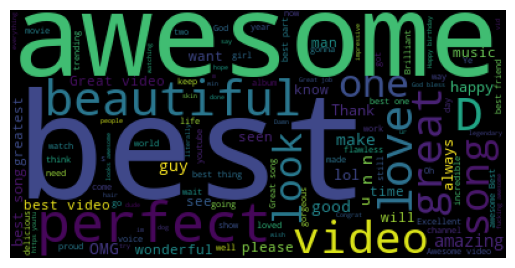

In [80]:
plt.imshow(wordcloud)
plt.axis(False)

In [81]:
total_negative = ' '.join(negative['comment_text'])

In [82]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

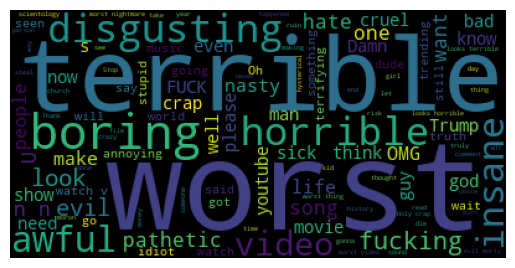

In [83]:
plt.imshow(wordcloud2) 
plt.axis('off')

In [84]:
# pip install emoji==2.2.0

In [85]:
import emoji

In [86]:
emoji.__version__

'2.2.0'

In [87]:
df['comment_text'].tail()

691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, dtype: object

In [88]:
c = "Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ..."

In [89]:
[i for i in c if i in emoji.EMOJI_DATA]

['😍', '❤', '❤', '❤']

In [90]:
all_emoji_list = [j for i in df['comment_text'].dropna() for j in i if j in emoji.EMOJI_DATA]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691374 entries, 0 to 691399
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   video_id      691374 non-null  object 
 1   comment_text  691374 non-null  object 
 2   likes         691374 non-null  object 
 3   replies       691374 non-null  object 
 4   polarity      691374 non-null  float64
dtypes: float64(1), object(4)
memory usage: 47.8+ MB


In [92]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [98]:
from collections import Counter

In [99]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [100]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [101]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [102]:
Counter(all_emoji_list).most_common(10)[1][0]

'😍'

In [103]:
emojis=[Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]

In [104]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [105]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [106]:
freqs=[Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]

In [107]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

<Axes: >

C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu

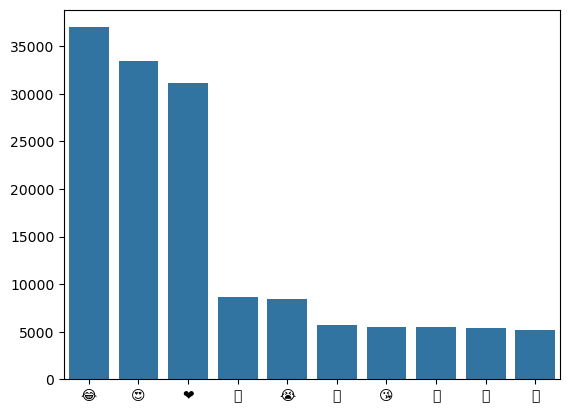

In [108]:
sns.barplot(x=emojis,y=freqs)

In [109]:
import plotly.graph_objs as go 
from plotly.offline import iplot

In [121]:
trace = go.Bar(x=emojis , y=freqs, marker=dict(color="black"))

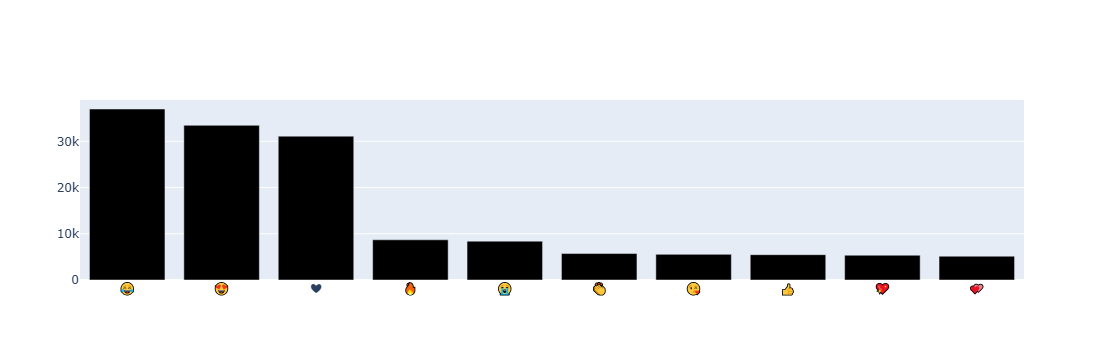

In [122]:
iplot([trace])